# Data Immersion Task 6.4 - Supervised Machine Learning - Regression Analysis

### Table of Contents

   #### 1. Importing Libraries and Data
   #### 2. Data Cleaning
   #### 3. Preparing Data for Regression Analysis
   #### 4. Conducting Regression Analysis
   #### 5. Regression Analysis with Removed Outliers

## 1. Importing Libaries and Data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Displaying graphs within the notebook
%matplotlib inline

# Defining path
path=r'D:\Adam\Employment\Data Analysis Course\Final Data Project'

# Importing dataframes

# - Realtor.com Historical Inventory by zip
df_rh = pd.read_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_FoodZips.csv'), index_col = False)

## 2. Data Cleaning

In [3]:
# I'm going to try various methods of data cleaning here, like in the tutorial
# But because I've used this dataset many times already (and cleaned in prep for those uses)
# it's probably already very clean and doesn't need anything further.

df_rh.columns

Index(['month_date_yyyymm', 'postal_code', 'city state',
       'median_listing_price', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_yy', 'new_listing_count',
       'new_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_yy', 'average_listing_price',
       'average_listing_price_yy', 'total_listing_count',
       'total_listing_count_yy', 'quality_flag', 'Zip', 'TysonZip', 'state',
       'lat', 'lng', 'county_fips', 'county_name'],
      dtype='object')

In [6]:
df_rh.shape

(17058, 25)

In [5]:
df_rh.head(20)

,month_date_yyyymm,postal_code,city state,median_listing_price,median_listing_price_yy,active_listing_count,active_listing_count_yy,new_listing_count,new_listing_count_yy,median_listing_price_per_square_foot,...,total_listing_count,total_listing_count_yy,quality_flag,Zip,TysonZip,state,lat,lng,county_fips,county_name
0,202303,71944,"grannis, ar",231950.0,NaN,2.0,NaN,0.0,NaN,150.0,...,2.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
1,202302,71944,"grannis, ar",304900.0,NaN,1.0,NaN,0.0,NaN,157.0,...,1.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
2,202301,71944,"grannis, ar",304900.0,NaN,1.0,NaN,0.0,NaN,157.0,...,1.0,0.0,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
3,202212,71944,"grannis, ar",304900.0,1.6513,1.0,0.0,0.0,NaN,157.0,...,1.0,0.0,1.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
4,202211,71944,"grannis, ar",324900.0,1.8252,1.0,0.0,0.0,-1.0,167.0,...,1.0,0.0,1.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
5,202210,71944,"grannis, ar",324900.0,NaN,1.0,NaN,0.0,NaN,167.0,...,1.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
6,202112,71944,"grannis, ar",115000.0,NaN,1.0,NaN,0.0,NaN,92.0,...,1.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
7,202111,71944,"grannis, ar",115000.0,NaN,1.0,NaN,2.0,NaN,92.0,...,1.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
8,202106,71944,"grannis, ar",49900.0,NaN,1.0,NaN,2.0,NaN,30.0,...,1.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk
9,202105,71944,"grannis, ar",125000.0,NaN,0.0,NaN,0.0,NaN,83.0,...,0.0,NaN,0.0,71944,71944,AR,34.23922,-94.32517,5113,Polk


In [8]:
# Check for missing values

df_rh.isnull().sum()

month_date_yyyymm                             0
postal_code                                   0
city state                                    0
median_listing_price                         26
median_listing_price_yy                    2943
active_listing_count                         18
active_listing_count_yy                    2993
new_listing_count                            15
new_listing_count_yy                       5901
median_listing_price_per_square_foot         40
median_listing_price_per_square_foot_yy    2961
median_square_feet                           39
median_square_feet_yy                      2961
average_listing_price                        26
average_listing_price_yy                   2943
total_listing_count                          15
total_listing_count_yy                     2890
quality_flag                               2548
Zip                                           0
TysonZip                                      0
state                                   

Only a few missing values in the variables I want to try.  I'll drop them for the purpose of this exercise

In [9]:
df_rh.dropna(subset=['median_listing_price', 'active_listing_count', 'median_square_feet', 'median_listing_price_per_square_foot', 'total_listing_count'], inplace=True)

In [15]:
# checking for duplicates

dups = df_rh.duplicated()
dups.shape

(17018,)

No duplicates

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

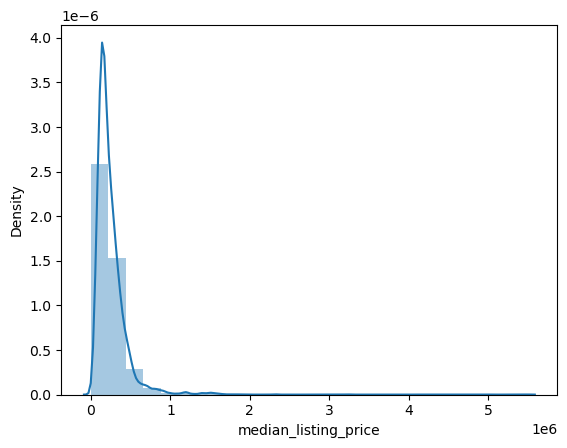

In [16]:
# Checking for extreme values
sns.distplot(df_rh['median_listing_price'], bins=25)

Obviously I have a number of values way outside the standard range. Will probably remove them after running the first test

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_listing_count', ylabel='Density'>

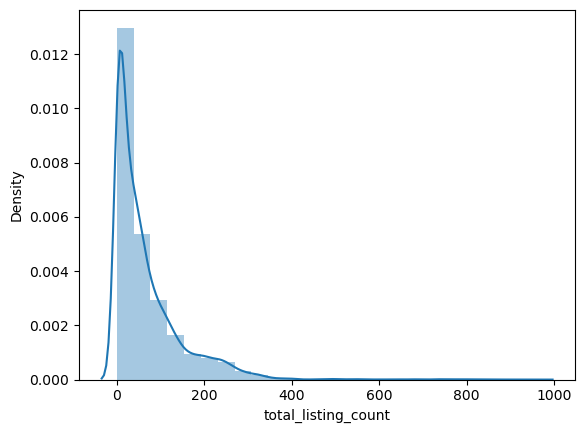

In [18]:
# checking more variables for extreme values
sns.distplot(df_rh['total_listing_count'], bins=25)

same as above, no surprise.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_listing_price_per_square_foot', ylabel='Density'>

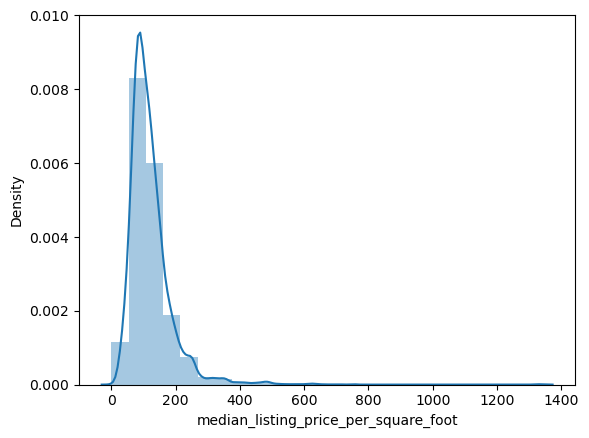

In [19]:
# checking more variables for extreme values
sns.distplot(df_rh['median_listing_price_per_square_foot'], bins=25)

this is possibly the most representative one I have yet, though clearly there are still a number of outlier values.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_square_feet', ylabel='Density'>

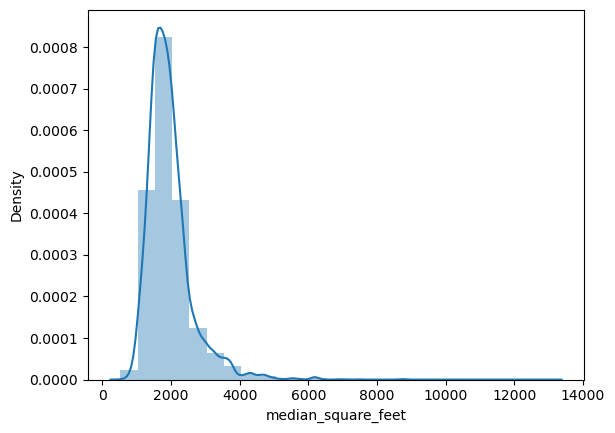

In [21]:
# checking more variables for extreme values
sns.distplot(df_rh['median_square_feet'], bins=25)

now this may be my most well-distributed variable.  Will probably use as one of my main variables to test.

In [22]:
df_rh['median_square_feet'].mean() # Checking the mean

1950.1000705135739

In [23]:
df_rh['median_square_feet'].median() # Checking the median

1828.0

In [24]:
df_rh['median_square_feet'].max() # Checking the max

13092.0

In [25]:
df_rh['median_square_feet'].min() # Checking the min

520.0

<AxesSubplot:>

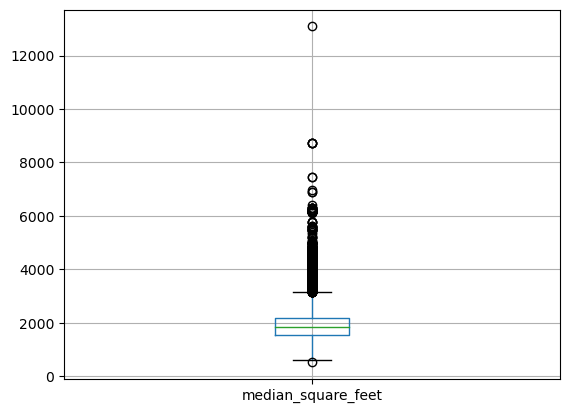

In [26]:
# making a boxplot to show quartiles (easier to identify outliers)

df_rh.boxplot(column='median_square_feet')

Obvious to see a lot of outliers above about 3000 median_square_feet

## 3. Preparing Data for Regression Analysis

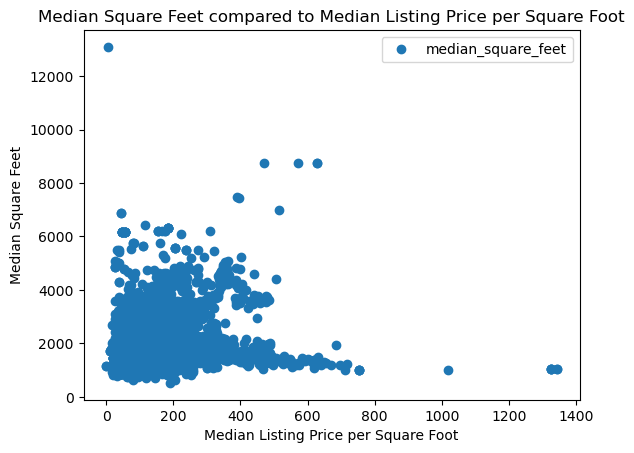

In [27]:
# Create a scatterplot using matplotlib to see how my two variables compare

df_rh.plot(x = 'median_listing_price_per_square_foot', y='median_square_feet',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Square Feet compared to Median Listing Price per Square Foot')  
plt.xlabel('Median Listing Price per Square Foot')  
plt.ylabel('Median Square Feet')  
plt.show()

There's such a concentration of them in lower left side, it's hard to say that one thing increasing affects the other.  I'll try one more variable to plot against.

#### 3a. Hypothesis
I hypothesize that when median listing price per square foot (in a given location) goes up, median square feet (in that same location) stays low or goes down

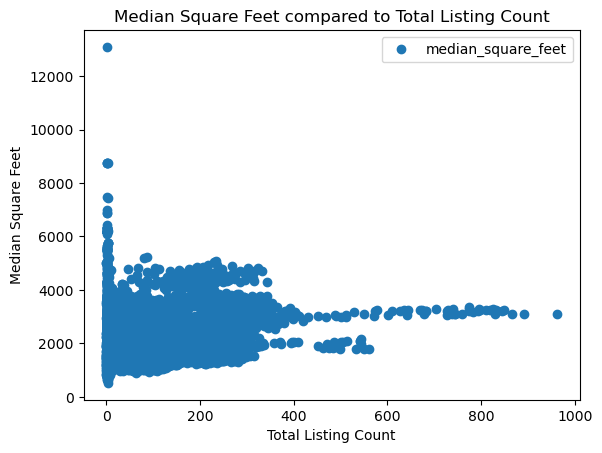

In [28]:
# Create a scatterplot using matplotlib to see how my two variables compare

df_rh.plot(x = 'total_listing_count', y='median_square_feet',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Square Feet compared to Total Listing Count')  
plt.xlabel('Total Listing Count')  
plt.ylabel('Median Square Feet')  
plt.show()

This is interesting, but again, not sure it can show a linear trend since most things are concentrated below 400 listing count, and where it has a focus area above that, it's mainly two different amounts - ~2000 sqft and ~3000 sqft

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rh['median_listing_price_per_square_foot'].values.reshape(-1,1)
y = df_rh['median_square_feet'].values.reshape(-1,1)

In [34]:
# Set the display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Set the print options
np.set_printoptions(threshold=np.inf)

In [35]:
X

array([[ 150.],
       [ 157.],
       [ 157.],
       [ 157.],
       [ 167.],
       [ 167.],
       [  92.],
       [  92.],
       [  30.],
       [  83.],
       [  83.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [ 309.],
       [  47.],
       [  47.],
       [  48.],
       [  48.],
       [  48.],
       [  48.],
       [  48.],
       [  48.],
       [  48.],
       [  56.],
       [  56.],
       [  56.],
       [  56.],
       [  56.],
       [  56.],
       [  56.],
       [ 182.],
       [ 181.],
       [ 184.],
       [ 184.],
       [ 182.],
       [ 182.],
       [ 180.],
       [ 183.],
       [ 185.],
       [ 189.],
       [ 192.],
       [ 184.],
       [ 172.],
       [ 174.],
       [ 171.],
       [ 170.],
       [ 170.],
       [ 161.],
       [ 158.],
       [ 154.],
       [ 159.],
       [ 155.],
       [ 152.],
       [ 147.],
       [ 148.],
       [

In [36]:
y

array([[ 1530.],
       [ 1944.],
       [ 1944.],
       [ 1944.],
       [ 1944.],
       [ 1944.],
       [ 1248.],
       [ 1248.],
       [ 1648.],
       [ 1501.],
       [ 1501.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1456.],
       [ 1296.],
       [ 1296.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 6150.],
       [ 1718.],
       [ 1771.],
       [ 1741.],
       [ 1846.],
       [ 1805.],
       [ 1780.],
       [ 1872.],
       [ 1832.],
       [ 1867.],
       [ 1720.],
       [ 1682.],
       [ 1560.],
       [ 1893.],
       [ 1748.],
       [ 1760.],
       [ 1832.],
       [ 1899.],
       [ 1743.],
       [ 1739.],
       [ 1847.],
       [ 1648.],
       [ 1646.

I'm not sure why it's not displaying my decimal values, but that shouldn't hurt anything

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [38]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

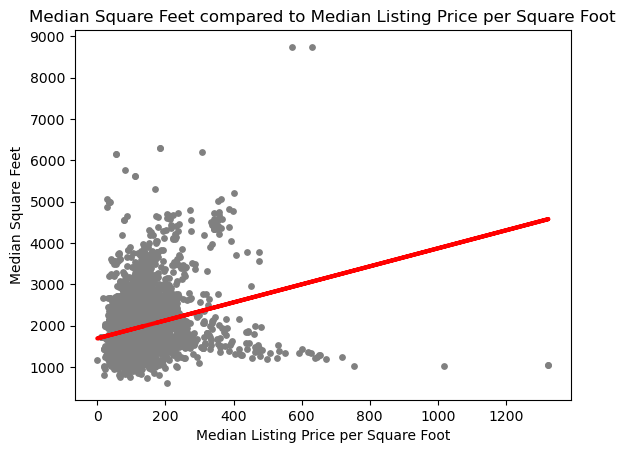

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Median Square Feet compared to Median Listing Price per Square Foot')
plot_test.xlabel('Median Listing Price per Square Foot')
plot_test.ylabel('Median Square Feet')
plot_test.show()

It's really not a surprise - a huge blob of points in one corner is hard to "predict" in a linear fashion.  This would seem to indicate that as median listing price per square foot increases that so does median square feet.  This not only seems unlikely, but essentially ignores the long-ish line of points along the bottom stretching horizontally from between 1000-2000 median square feet.  If I take out those big outliers in the top, it might change.

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)  # this describes how y variable changes when X changes
print('Mean squared error: ', rmse)  # measures average distance from line. whether this is large or small error depends
                                    # on the variation (range?) within the data Im' studying
print('R2 score: ', r2) # between 0 and 1, closer to 0 is bad fit, closer to 1 is a good fit

Slope: [[2.17990173]]
Mean squared error:  390883.548987544
R2 score:  0.0457401539212573


Haha, my model performance stats are terrible!  Mean squared error is off the charts, and magnitudes greater than my largest data point. R2 score is less than 0.1 - so close to zero!  A terrible model

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1786.0,1976.787604
1,1344.0,1939.729274
2,1965.0,2035.644950
3,2279.0,1987.687112
4,1365.0,1924.469962
5,1656.0,1911.390552
6,1491.0,2144.640037
7,1675.0,1869.972419
8,2240.0,1989.867014
9,2041.0,2111.941511


A few close, but mostly major differences

I doubt there was any data bias in this at all.  It's just not the sort of data that shows a linear trend. Instead it works in clusters.  Maybe a future exercise will better address that.

## 5. Regression Analysis with Removed Outliers

In [45]:
# I'm going to run it again with my biggest outliers removed.  
# I have a feeling it'll change the slope significantly, but I'm not sure.

In [46]:
# Filtering out values above 6000, because that's clearly where it slopes off in the histogram
df_filtered = df_rh[df_rh['median_square_feet'] <=6000] 

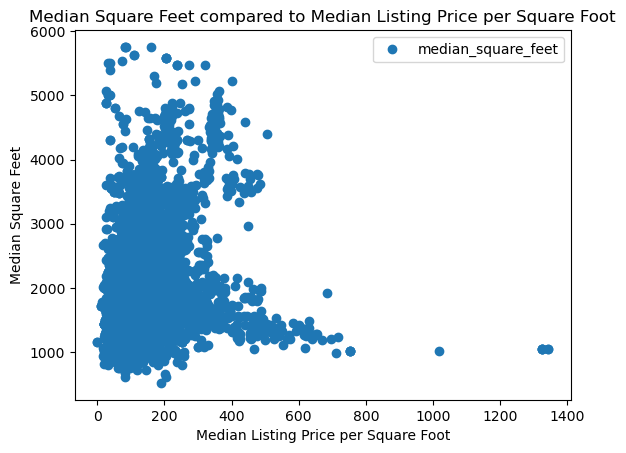

In [47]:
# Seeing how it looks without those outliers

df_filtered.plot(x = 'median_listing_price_per_square_foot', y='median_square_feet',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Square Feet compared to Median Listing Price per Square Foot')  
plt.xlabel('Median Listing Price per Square Foot')  
plt.ylabel('Median Square Feet')  
plt.show()

In [48]:
# Reshaping again

X_2 = df_filtered['median_listing_price_per_square_foot'].values.reshape(-1,1)
y_2 = df_filtered['median_square_feet'].values.reshape(-1,1)

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [50]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [51]:
# Predicting

y_predicted_2 = regression.predict(X_test_2)

In [52]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

print('Slope:' ,regression.coef_)  # this describes how y variable changes when X changes
print('Mean squared error: ', rmse)  # measures average distance from line. whether this is large or small error depends
                                    # on the variation (range?) within the data Im' studying
print('R2 score: ', r2) # between 0 and 1, closer to 0 is bad fit, closer to 1 is a good fit

Slope: [[1.89935097]]
Mean squared error:  367697.4917924673
R2 score:  0.05418774515249147


Haha, still super terrible but marginally better!

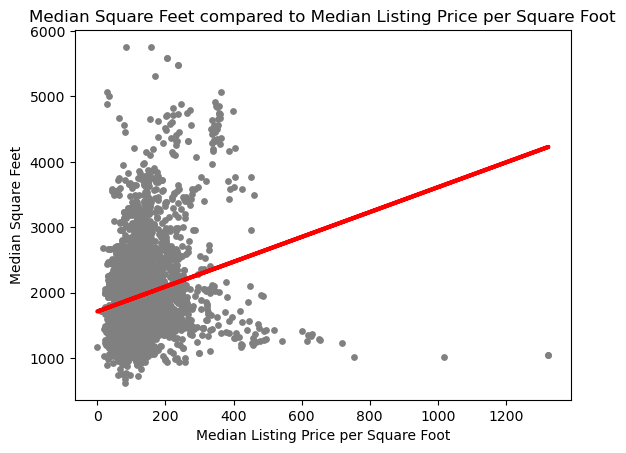

In [53]:
# Visualizing the filtered results

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Median Square Feet compared to Median Listing Price per Square Foot')
plot_test.xlabel('Median Listing Price per Square Foot')
plot_test.ylabel('Median Square Feet')
plot_test.show()

Hard to see the improvement, but I trust it's marginally better.

In [54]:
# Comparing predicted to actual variables

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,2125.0,1987.411020
1,2305.0,1886.745419
2,1456.0,2298.904580
3,2254.0,1799.375274
4,1772.0,1818.368784
5,833.0,1955.122054
6,1772.0,1928.531140
7,1782.0,1863.953207
8,1500.0,1848.758399
9,1732.0,1843.060346


Yeah, I'm not sure that this looks noticably better.  This just isn't the kind of information that can be graphed in a linear way.  Looking back at my pair plot in Task 6.2 none of my variables are really the sort that show a linear trend.  Instead they're all clusters (of some sort) of points.  So not really worth it with the variables in this particular dataset.  Though I may revisit this when I combine more of my datasources.